# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
## Hello!
## Since the starter code uses a single # to mark its comments, I will be using ## to mark anything I've written
## So like these comments here, if you see ## that means I wrote it.

In [2]:
## If Citipy doesn't work, comment out the below line of code and run that before running the rest.
## !pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
## This next segment grabs a number of cities at random using the ranges above and stores them in a list

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
## First I'm going to create a number of lists to store the data that I need including the latitude, longitude, temperature
## humidity, cloudiness, and wind speed
cityName = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
windSpeed = []


In [7]:
## Defining variables for API call loop
url = "https://api.openweathermap.org/data/2.5/weather?q="
apiKEY = weather_api_key

In [8]:
## Here I'm using a for loop to do an API call for each city in my list.
for city in cities:
    print(f'Processing for city: {city}')
    responseJSON = requests.get(url + city + "&appid=" + apiKEY).json()
    ## This if is to check, just in case, that a city hasn't been chosen twice
    if city not in cityName:
        ## Now we do a try here to make sure these work
        try:
            ## This loop goes through the response and grabs all the details I need and appends them to the lists I made earlier.
            ## This way all the cities and their respective data have the same index in the lists
            ## So when we make the dataframe later, the 
            latitude.append(responseJSON["coord"]["lat"])
            longitude.append(responseJSON["coord"]["lon"])
            temperature.append(responseJSON["main"]["temp"])
            humidity.append(responseJSON["main"]["humidity"])
            cloudiness.append(responseJSON["clouds"]["all"])
            windSpeed.append(responseJSON["wind"]["speed"])
            cityName.append(city)
        ## If any of them don't, we ignore it and move to the next one
        except:
            print(f'There is no data for {city}. Moving to next city.')
    ## If the city is already in the cityName list, it returns that the city has already been added and will move to the next one
    else:
        print(f'{city} has already been processed. Moving to next city.')

Processing for city: rikitea
Processing for city: berestechko
Processing for city: fortuna
Processing for city: provideniya
Processing for city: klaksvik
Processing for city: cherskiy
Processing for city: albany
Processing for city: ribeira grande
Processing for city: torbay
Processing for city: taolanaro
There is no data for taolanaro. Moving to next city.
Processing for city: belushya guba
There is no data for belushya guba. Moving to next city.
Processing for city: mataura
Processing for city: bredasdorp
Processing for city: bethel
Processing for city: butaritari
Processing for city: lorengau
Processing for city: along
Processing for city: brae
Processing for city: dikson
Processing for city: saint-paul
Processing for city: soyo
Processing for city: waingapu
Processing for city: auki
Processing for city: samusu
There is no data for samusu. Moving to next city.
Processing for city: samana
Processing for city: cape town
Processing for city: port alfred
Processing for city: lagoa
Proce

Processing for city: eyl
Processing for city: barranca
Processing for city: dormont
Processing for city: ostrovnoy
Processing for city: neftcala
Processing for city: ngukurr
There is no data for ngukurr. Moving to next city.
Processing for city: carnarvon
Processing for city: aleksandrov gay
Processing for city: murree
Processing for city: nurota
Processing for city: ulladulla
Processing for city: pevek
Processing for city: cheuskiny
There is no data for cheuskiny. Moving to next city.
Processing for city: kapuskasing
Processing for city: sao filipe
Processing for city: fuling
Processing for city: pierre
Processing for city: alekseyevsk
Processing for city: inta
Processing for city: qasigiannguit
Processing for city: ningxiang
Processing for city: dali
Processing for city: gizo
Processing for city: altagracia de orituco
Processing for city: fiumicino
Processing for city: port lincoln
Processing for city: makakilo city
Processing for city: nsanje
Processing for city: dingle
Processing f

Processing for city: ankpa
Processing for city: huancavelica
Processing for city: hambantota
Processing for city: vaitape
Processing for city: mount barker
Processing for city: ossipee
Processing for city: la crosse
Processing for city: arvika
Processing for city: orda
Processing for city: nantucket
Processing for city: ajtos
Processing for city: marcona
There is no data for marcona. Moving to next city.
Processing for city: gaziantep
Processing for city: taoudenni
Processing for city: manokwari
Processing for city: derzhavinsk
Processing for city: eregli
Processing for city: chiredzi
Processing for city: green valley
Processing for city: itaueira
Processing for city: mayo
Processing for city: yerbogachen
Processing for city: sancti spiritus
Processing for city: asau
Processing for city: tahta
Processing for city: zyryanka
Processing for city: polunochnoye
Processing for city: kelo
Processing for city: dudinka
Processing for city: katsiveli
There is no data for katsiveli. Moving to nex

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
## Using the lists I made to create
citiesDF = pd.DataFrame({"City" : cityName, 
                         "Lat" : latitude, 
                         "Lng" : longitude, 
                         "Temp" : temperature, 
                         "Humidity" : humidity, 
                         "Cloudiness" : cloudiness,
                         "Wind Speed" : windSpeed})
citiesDF

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,rikitea,-23.1203,-134.9692,296.13,75,20,7.04
1,berestechko,50.3605,25.1107,300.93,64,73,5.56
2,fortuna,40.5982,-124.1573,284.72,93,90,0.00
3,provideniya,64.3833,-173.3000,282.04,99,100,1.50
4,klaksvik,62.2266,-6.5890,284.66,96,100,4.10
...,...,...,...,...,...,...,...
559,zhiryatino,53.2228,33.7306,300.33,62,10,1.16
560,turinsk,58.0458,63.6960,288.16,57,98,2.56
561,nongan,44.3820,125.1685,298.38,80,82,3.84
562,comodoro rivadavia,-45.8667,-67.5000,281.07,39,0,7.72


In [13]:
## Getting a summary statistics table. The .describe method makes this super easy to display
sumStats = citiesDF.describe()
sumStats

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,22.116310,16.126415,295.272961,66.693262,54.803191,3.619592
std,32.840754,90.935424,8.303386,22.384177,37.905865,2.520315
min,-54.800000,-179.166700,273.960000,5.000000,0.000000,0.000000
25%,-3.929475,-67.024050,289.357500,55.000000,19.500000,1.850000
50%,28.266700,19.249050,296.845000,71.500000,64.000000,3.090000
75%,49.791650,95.778725,301.142500,84.250000,90.000000,4.965000
max,78.218600,179.316700,319.690000,100.000000,100.000000,18.860000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
## This says skip this step if there are no cities with humidity over 100% which my data doesn't contain
## However, for general use, I'll still write code that does drop the values
cleanCityData = citiesDF[citiesDF.Humidity <= 100]
cleanCityData

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,rikitea,-23.1203,-134.9692,296.13,75,20,7.04
1,berestechko,50.3605,25.1107,300.93,64,73,5.56
2,fortuna,40.5982,-124.1573,284.72,93,90,0.00
3,provideniya,64.3833,-173.3000,282.04,99,100,1.50
4,klaksvik,62.2266,-6.5890,284.66,96,100,4.10
...,...,...,...,...,...,...,...
559,zhiryatino,53.2228,33.7306,300.33,62,10,1.16
560,turinsk,58.0458,63.6960,288.16,57,98,2.56
561,nongan,44.3820,125.1685,298.38,80,82,3.84
562,comodoro rivadavia,-45.8667,-67.5000,281.07,39,0,7.72


In [18]:
#  Get the indices of cities that have humidity over 100%.

## This isn't necessary since I can just do the search from the above cell that filters out all cities that have humidity
## less than or equal to 100 effectively dropping all data with humidity greater than 100

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Also not necessary. See above.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

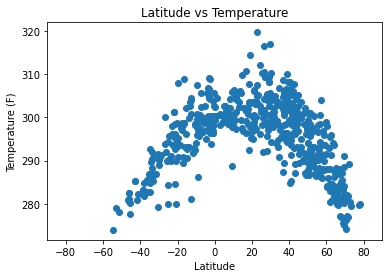

In [46]:
plt.scatter(cleanCityData["Lat"], cleanCityData["Temp"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90, 90)
plt.show()

## Latitude vs. Humidity Plot

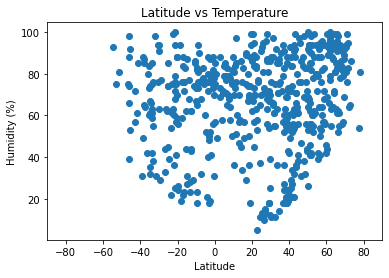

In [45]:
plt.scatter(cleanCityData["Lat"], cleanCityData["Humidity"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.show()

## Latitude vs. Cloudiness Plot

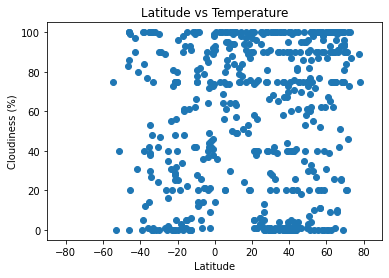

In [43]:
plt.scatter(cleanCityData["Lat"], cleanCityData["Cloudiness"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.show()

## Latitude vs. Wind Speed Plot

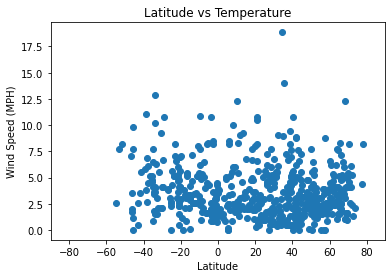

In [44]:
plt.scatter(cleanCityData["Lat"], cleanCityData["Wind Speed"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-90, 90)
plt.show()

## Linear Regression

In [48]:
## First, I'm going to define two new dataframes. One for the Northern hemisphere and one for the southern.
northernHemisphere = cleanCityData[cleanCityData.Lat >= 0]
southernHemisphere = cleanCityData[cleanCityData.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

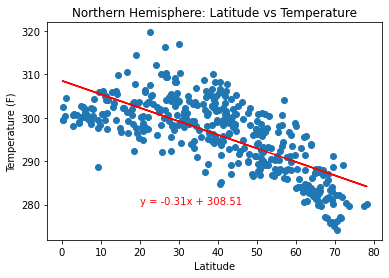

In [86]:
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Northern Hemisphere: Latitude vs Temperature")
plt.text(20,280,regressionEquation, color = "Red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

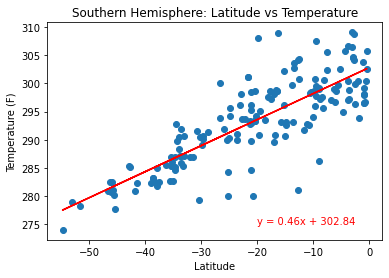

In [87]:
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere: Latitude vs Temperature")
plt.text(-20,275,regressionEquation, color = "Red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

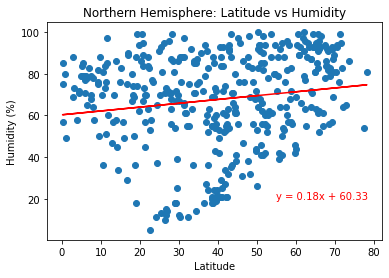

In [88]:
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs Humidity")
plt.text(55,20,regressionEquation, color = "Red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

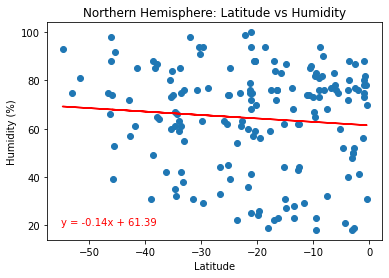

In [90]:
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs Humidity")
plt.text(-55,20,regressionEquation, color = "Red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

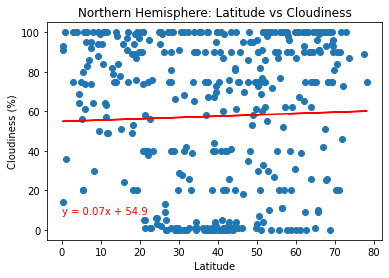

In [100]:
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs Cloudiness")
plt.text(0,8,regressionEquation, color = "Red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

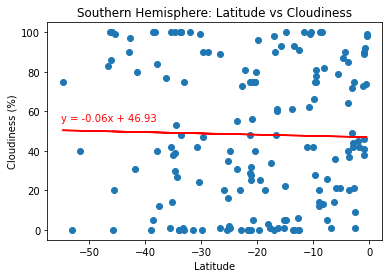

In [104]:
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs Cloudiness")
plt.text(-55,55,regressionEquation, color = "Red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

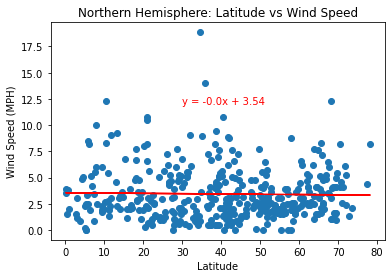

In [108]:
xValues = northernHemisphere["Lat"]
yValues = northernHemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Northern Hemisphere: Latitude vs Wind Speed")
plt.text(30,12,regressionEquation, color = "Red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

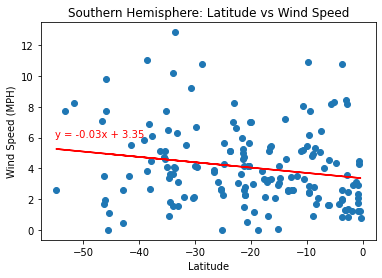

In [111]:
xValues = southernHemisphere["Lat"]
yValues = southernHemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regression = xValues * slope + intercept
regressionEquation = f'y = {round(slope, 2)}x + {round(intercept,2)}'
plt.scatter(xValues, yValues)
plt.plot(xValues, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("Southern Hemisphere: Latitude vs Wind Speed")
plt.text(-55,6,regressionEquation, color = "Red")
plt.show()